In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [ ]:
train  = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/train_tweets.csv')
test = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/test_tweets.csv')

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/train_tweets.csv')

In [ ]:
train.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2


In [ ]:
test.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids
0,6238,13,2020,7,26,10,5.0,2.0,0.0,True,A,0,"['98', '99', '99', '99', '99', '78', '79', '80']"
1,37458,14,2018,1,15,18,0.0,0.0,1.0,False,C,0,"['78', '79', '80', '98']"
2,23968,50,2019,2,25,20,0.0,1.0,0.0,False,C,0,"['78', '79', '80']"
3,24137,50,2018,12,8,21,0.0,1.0,1.0,False,C,0,"['78', '79', '80']"
4,8064,30,2020,9,29,16,2.0,2.0,0.0,True,A,0,"['78', '79', '79', '80', '98', '99']"


In [ ]:
print(train.shape)
print(test.shape)

(29625, 14)
(12697, 13)


In [ ]:
train.dtypes

tweet_id                    int64
tweet_user_id               int64
tweet_created_at_year       int64
tweet_created_at_month      int64
tweet_created_at_day        int64
tweet_created_at_hour       int64
tweet_hashtag_count       float64
tweet_url_count           float64
tweet_mention_count       float64
tweet_has_attachment         bool
tweet_attachment_class     object
tweet_language_id           int64
tweet_topic_ids            object
virality                    int64
dtype: object

In [ ]:
test.dtypes

tweet_id                    int64
tweet_user_id               int64
tweet_created_at_year       int64
tweet_created_at_month      int64
tweet_created_at_day        int64
tweet_created_at_hour       int64
tweet_hashtag_count       float64
tweet_url_count           float64
tweet_mention_count       float64
tweet_has_attachment         bool
tweet_attachment_class     object
tweet_language_id           int64
tweet_topic_ids            object
dtype: object

In [ ]:
train.isnull().sum()

tweet_id                     0
tweet_user_id                0
tweet_created_at_year        0
tweet_created_at_month       0
tweet_created_at_day         0
tweet_created_at_hour        0
tweet_hashtag_count          0
tweet_url_count              0
tweet_mention_count          0
tweet_has_attachment         0
tweet_attachment_class       0
tweet_language_id            0
tweet_topic_ids           4285
virality                     0
dtype: int64

In [ ]:
test.isnull().sum()

tweet_id                     0
tweet_user_id                0
tweet_created_at_year        0
tweet_created_at_month       0
tweet_created_at_day         0
tweet_created_at_hour        0
tweet_hashtag_count          0
tweet_url_count              0
tweet_mention_count          0
tweet_has_attachment         0
tweet_attachment_class       0
tweet_language_id            0
tweet_topic_ids           1802
dtype: int64

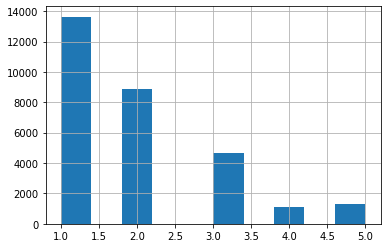

In [ ]:
train.virality.hist()

In [ ]:
train.virality.value_counts() * 100 /train.shape[0]

1    46.015190
2    30.005063
3    15.682700
5     4.465823
4     3.831224
Name: virality, dtype: float64

In [ ]:
train.pop('tweet_topic_ids')
train.pop('tweet_attachment_class')
y = train.pop('virality')

In [ ]:
test.pop('tweet_topic_ids')
test.pop('tweet_attachment_class')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20737, 11)
(8888, 11)
(20737,)
(8888,)


In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.score(X_train,y_train)

1.0

In [ ]:
clf.score(X_test,y_test)

0.6585283528352835

In [ ]:
clf.fit(train,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.score(train,y)

1.0

In [ ]:
sol1['virality'] = clf.predict(test)

In [ ]:
sol1 = test.tweet_id.to_frame()

In [ ]:
sol1.head()

,tweet_id,virality
0,6238,1
1,37458,1
2,23968,4
3,24137,5
4,8064,3


In [ ]:
sol1.to_csv('sol1.csv',index=False)

In [ ]:
clf2 = XGBClassifier()

In [ ]:
clf2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(clf2.score(X_train,y_train))
print(clf2.score(X_test,y_test))

0.6533731976660077
0.650990099009901


In [ ]:
train.describe()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_language_id
count,29625.000000,29625.000000,29625.000000,29625.000000,29625.000000,29625.000000,29625.000000,29625.000000,29625.000000,29625.000000
mean,21136.827477,27.489755,2019.005705,7.045536,15.814717,15.048236,1.054008,1.218903,0.641283,0.153181
std,12160.900255,16.271052,1.447595,3.527015,8.872990,5.188924,1.126270,0.985059,1.011227,1.245717
min,0.000000,0.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10639.000000,14.000000,2019.000000,4.000000,8.000000,13.000000,0.000000,1.000000,0.000000,0.000000
50%,21113.000000,27.000000,2019.000000,7.000000,16.000000,16.000000,1.000000,1.000000,0.000000,0.000000
75%,31645.000000,42.000000,2020.000000,10.000000,24.000000,19.000000,2.000000,2.000000,1.000000,0.000000
max,42323.000000,55.000000,2021.000000,12.000000,31.000000,23.000000,14.000000,8.000000,16.000000,30.000000


In [ ]:
train.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,0
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,0
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,0
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,0
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,0


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train_scaled.describe()

In [ ]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
print('Train Accuracy: ', forest.score(X_train,y_train))
print('Test Accuracy: ', forest.score(X_test,y_test))

Train Accuracy:  1.0
Test Accuracy:  0.6632538253825383


In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 32.1min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 69.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 154.1min finished


In [ ]:
print(bestF)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
bestF

In [ ]:
gridF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [ ]:
clf3 = RandomForestClassifier(n_estimators=1200,max_depth=25, min_samples_leaf=1, min_samples_split=10)
clf3.fit(X_train,y_train)
print('Train Accuracy: ', clf3.score(X_train,y_train))
print('Test Accuracy: ', clf3.score(X_test,y_test))

Train Accuracy:  0.8575975309832666
Test Accuracy:  0.68001800180018


In [ ]:
clf4 = RandomForestClassifier(n_estimators=1200,max_depth=25, min_samples_leaf=1, min_samples_split=10)
clf4.fit(train, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
sol2 = test.tweet_id.to_frame()
sol2['virality'] = clf4.predict(test)
sol2.to_csv('sol2.csv',index=False)

In [ ]:
sol2.head()

,tweet_id
0,6238
1,37458
2,23968
3,24137
4,8064


Fine Tuning

In [ ]:
{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [ ]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
print('Train Accuracy: ', forest.score(X_train,y_train))
print('Test Accuracy: ', forest.score(X_test,y_test))

Train Accuracy:  1.0
Test Accuracy:  0.6592034203420342


In [ ]:
n_estimators = [1000, 1200,1100]
max_depth = [20, 23, 25, 27]
min_samples_split = [8, 10, 12]
min_samples_leaf = [1] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 26.2min finished


In [ ]:
bestF.best_params_

{'max_depth': 23,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 1200}

In [ ]:
bestF.best_score_

0.671601706973621

In [ ]:
clf5 = RandomForestClassifier(n_estimators=1200,max_depth=23, min_samples_leaf=1, min_samples_split=8)
clf5.fit(X_train,y_train)
print('Train Accuracy: ', clf5.score(X_train,y_train))
print('Test Accuracy: ', clf5.score(X_test,y_test))

Train Accuracy:  0.8860973139798428
Test Accuracy:  0.6685418541854186


In [ ]:
clf6 = RandomForestClassifier(n_estimators=1200,max_depth=23, min_samples_leaf=1, min_samples_split=8)
clf6.fit(train, y)
sol3 = test.tweet_id.to_frame()
sol3['virality'] = clf6.predict(test)
sol3.to_csv('sol3.csv',index=False)

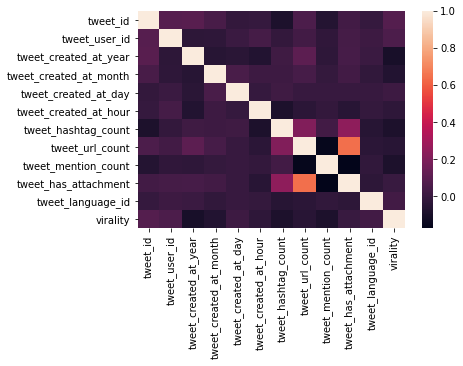

In [ ]:
sns.heatmap(data.corr())

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Users/users.csv')

In [ ]:
users.head()

,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,0,1164,48720,70469,5956,True,14122,True,0,2010,8
1,1,3914,85361,2171,5943,False,6957,False,0,2011,9
2,2,8292,200944,1416,8379,True,83485,True,0,2011,6
3,3,1770,15385,4572,1866,True,12265,True,0,2011,8
4,4,15311,459083,1021,7368,False,121193,False,0,2011,6


In [ ]:
users.shape

(52, 11)

In [ ]:
users

In [ ]:
data

In [ ]:
len(data.tweet_user_id.unique())

52

In [ ]:
data.tweet_user_id.value_counts()

In [ ]:
data2 = data.copy()


In [ ]:
data=data2.copy()

In [ ]:
data.shape

(29625, 14)

In [ ]:
data.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2


In [ ]:
[data.loc[0,'tweet_user_id']]

10

In [ ]:
users.head(15)

,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,0,1164,48720,70469,5956,True,14122,True,0,2010,8
1,1,3914,85361,2171,5943,False,6957,False,0,2011,9
2,2,8292,200944,1416,8379,True,83485,True,0,2011,6
3,3,1770,15385,4572,1866,True,12265,True,0,2011,8
4,4,15311,459083,1021,7368,False,121193,False,0,2011,6
5,5,882,5969,2352,841,True,3184,False,0,2011,1
6,6,4736,23127,1345,909,False,12033,True,0,2011,1
7,7,0,103254,529,990,True,169,True,0,2014,11
8,8,7776,168167,11290,1816,True,7065,True,0,2013,4
9,10,9365,398591,136081,18462,True,169980,True,0,2011,10


In [ ]:
users[users.user_id==10]

,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
9,10,9365,398591,136081,18462,True,169980,True,0,2011,10


In [ ]:
data.loc[0] = users[users.user_id==10]

In [ ]:
data.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24644.0,4.0,2020.0,6.0,19.0,0.0,0.0,1.0,0.0,0.0,C,0.0,"['43', '78', '79', '80', '80', '89', '98', '99...",3.0
2,36321.0,54.0,2019.0,6.0,2.0,15.0,2.0,3.0,0.0,1.0,A,0.0,"['79', '80', '98', '98', '98', '99', '99', '10...",1.0
3,2629.0,42.0,2020.0,9.0,6.0,17.0,0.0,1.0,1.0,1.0,A,0.0,"['43', '79', '80', '98', '99', '99', '79', '80']",2.0
4,28169.0,32.0,2020.0,11.0,4.0,17.0,2.0,1.0,0.0,1.0,A,0.0,"['79', '80', '98', '99', '43', '89']",2.0


In [ ]:
users.columns

Index(['user_id', 'user_like_count', 'user_followers_count',
       'user_following_count', 'user_listed_on_count', 'user_has_location',
       'user_tweet_count', 'user_has_url', 'user_verified',
       'user_created_at_year', 'user_created_at_month'],
      dtype='object')

In [ ]:
test.tweet_user_id.value_counts()